<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_03_numpy_arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the following hidden code to get few helper functions

* `visualize_array(arr)` -- visualizes array
* `how_broadcast(arr1, arr2)` -- visualizes how arrays `arr1` and `arr2` are broadcasted together.

In [11]:
#@title Helper Functions

str_style = '''
<style>
table {
  border-collapse: collapse;
}

td {
  border: 3px solid #666666;
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

.up{
  position: absolute; 
  right: 0;
  top: 0;
  background: white;
  text-align: right;
  font-size: 16px;
  font-family: Courier;
  font-weight: bolder;
  color: blue;
  opacity: 1.0;
  background-color:rgba(0, 0, 0, 0.0);
}

.down{
  position: absolute; 
  right: 0;
  bottom: 0;
  background: white;
  text-align: right;
  font-size: 16px;
  font-family: Courier;
  font-weight: bolder;
  color: red;
  opacity: 0.9;
  background-color:rgba(0, 0, 0, 0.0);
}
</style>
'''

#background-color:rgba(0, 0, 0, 0.0);

def enclose_element(element, idx_up, idx_down):
  return ('\t<td>' + str(element) + '<span class="up">' 
                   + str(idx_up)  + '</span><span class="down">' 
                   + str(idx_down) + '</span></td>')

def horizontal_tbl(array, color):
  result = '<table bgcolor="' + color + '"><tr>\n'
  max_count = len(array)
  for idx, e in enumerate(array):
    result += enclose_element(e, idx, idx - max_count) + '\n'
  result += '</tr></table>\n'
  return result

def vertical_tbl(array, color):
  result = '<table bgcolor="' + color + '">\n'
  max_count = len(array)
  for idx, e in enumerate(array):
    result += '<tr>' + enclose_element(e, idx, idx - max_count) + '</tr>\n'
  result += '</table>\n'
  return result

def recursive_tbl(array, parity, max_levels, level=0, color_A=[150,200,255], color_B=[75, 100, 170]):
  if len(array.shape) == 1:
    return horizontal_tbl(array, "".join(["%02x" % int(c) for c in color_A]))
  mix = np.array(color_A) * (level/max_levels) + np.array(color_B) * (1.0 - level/max_levels)
  color = "".join(["%02x" % int(c) for c in mix])
  if parity:
    return horizontal_tbl([recursive_tbl(x, not parity, max_levels, level+1, color_A, color_B) for x in array], color)
  else:
    return vertical_tbl([recursive_tbl(x, not parity, max_levels, level+1, color_A, color_B) for x in array], color)

def array_to_html(array):
  return str_style + recursive_tbl(array, len(array.shape) % 2, len(array.shape)-1)

def visualize_array(array):
  array_str = array_to_html(array)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(array_str))

str_style_bigtbl = '''
<style>
.bigtable {
  border-collapse: collapse;
}

.bigtd {
  border: 3px solid #ffd4d3ff;
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

</style>
'''

def envelope_tbl(lst):
  result = '<table class="bigtable">\n'
  for row in lst:
    result += '<tr>\n\t'
    for e in row:
      if isinstance(e, dict):
        result += '<td class="bigtd" '
        for key in e:
          if key != 'text':
            result += str(key) + '="' + str(e[key]) + '" '
        result += '>' + str(e['text']) + '</td>'
      else:
        result += '<td class="bigtd">' + str(e) + '</td>'
    result += '\n</tr>\n'
  result += '</table>'
  return result

def draw_tbl(lst):
  result = envelope_tbl(lst)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style_bigtbl + result))


def how_broadcast(a, b):
  x, y = np.broadcast_arrays(a, b)
  draw_tbl([[{'text': 'ORIGINAL ARRAYS', 'colspan':2}],
            [array_to_html(a), array_to_html(b)],
            [{'text': 'BROADCASTED', 'colspan':2}],
            [array_to_html(x), array_to_html(y)]])

#Beginner

##1. Import numpy as np and see the version

**Problem:**
Import numpy as “np” and print the version number.

In [ ]:
# Enter your code here

In [ ]:
#@title ###Solution (double-click to see the source code)
import numpy as np
print(np.__version__)

1.18.5


##2. How to create a 1D array?


**Problem:**
Create a 1D array of numbers from 0 to 9

In [ ]:
import numpy as np

# Enter your code here
a =

# Visualization
visualize_array(a)

In [ ]:
#@title ###Solution (double-click to see the source code)
import numpy as np

# Solution
a = np.arange(10)

# Visualization
visualize_array(a)

00-10,11-9,22-8,33-7,44-6,55-5,66-4,77-3,88-2,99-1


##3. How to create a boolean array?

**Problem:**
Create a 3x3 numpy array of all True’s

In [ ]:
import numpy as np

# Enter your code here
arr = 

# Visualization
visualize_array(arr)

In [ ]:
#@title ###Solution A (double-click to see the source code)

import numpy as np

# Solution
arr = np.full((3, 3), True, dtype=bool)

# Visualization
visualize_array(arr)

True0-3,True1-2,True2-1
True0-3,True1-2,True2-1
True0-3,True1-2,True2-1


In [ ]:
#@title ###Solution B (double-click to see the source code)

import numpy as np

# Solution
arr = np.ones((3,3), dtype=bool)

visualize_array(arr)

True0-3,True1-2,True2-1
True0-3,True1-2,True2-1
True0-3,True1-2,True2-1


##4. How to extract items that satisfy a given condition from 1D array?

**Problem:**
Extract all odd numbers from numpy.array.

In [ ]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Enter your code here
result = 

# Visualize
print('INPUT:')
visualize_array(arr)
print('OUTPUT:')
visualize_array(result)

In [ ]:
#@title ###Solution (double-click to see the source code)

import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Solution
result = arr[arr % 2 == 1]

# Visualize
print('INPUT:')
visualize_array(arr)
print('OUTPUT:')
visualize_array(result)

INPUT:


00-10,11-9,22-8,33-7,44-6,55-5,66-4,77-3,88-2,99-1


OUTPUT:


10-5,31-4,52-3,73-2,94-1


##5. How to replace items that satisfy a condition with another value in numpy array?

**Problem:**
Replace all odd numbers in numpy.array with -1

In [ ]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# Visualize
print('INPUT:')
visualize_array(arr)

# Enter your code here

# Visualize
print('OUTPUT:')
visualize_array(arr)

In [ ]:
#@title ###Solution (double-click to see the source code)

import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# Visualize
print('INPUT:')
visualize_array(arr)

# Solution
arr[arr % 2 == 1] = -1

# Visualize
print('OUTPUT:')
visualize_array(arr)

INPUT:


00-10,11-9,22-8,33-7,44-6,55-5,66-4,77-3,88-2,99-1


OUTPUT:


00-10,-11-9,22-8,-13-7,44-6,-15-5,66-4,-17-3,88-2,-19-1


##6. How to reshape an array?

**Problem:**
Convert a 1D array to a 2D array with 2 rows.

In [ ]:
import numpy as np

# Input
arr = np.arange(10)

# Enter your code here
result = 

# Visualize
print('INPUT:')
visualize_array(arr)
print('OUTPUT:')
visualize_array(result)

In [ ]:
#@title ###Solution (double-click to see the source code)

import numpy as np

# Input
arr = np.arange(10)

# Solution
result = arr.reshape(2, -1) # Setting to -1 automatically decides the number of cols

# Visualize
print('INPUT:')
visualize_array(arr)
print('OUTPUT:')
visualize_array(result)

INPUT:


00-10,11-9,22-8,33-7,44-6,55-5,66-4,77-3,88-2,99-1


OUTPUT:


00-5,11-4,22-3,33-2,44-1
50-5,61-4,72-3,83-2,94-1


##7. How to compute the mean, median, standard deviation of a numpy array?

**Problem:**
Find the mean, median, standard deviation of given 1D array.

In [ ]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Enter your code here
mu = 
med = 
sd =

# Output
visualize_array(arr)
print('RESULT:')
print("mean = ", mu, "; median = ", med, "; deviation = ", sd)

In [ ]:
#@title ###Solution (double-click to see the source code)

import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Solution
mu, med, sd = np.mean(arr), np.median(arr), np.std(arr)

# Output
visualize_array(arr)
print('RESULT:')
print("mean = ", mu, "; median = ", med, "; deviation = ", sd)

10-10,21-9,32-8,43-7,54-6,65-5,76-4,87-3,98-2,109-1


RESULT:
mean =  5.5 ; median =  5.5 ; deviation =  2.8722813232690143


##8. How to find the percentile scores of a numpy array?


**Problem:**
Find the 5th and 95th percentile of given array.

In [ ]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])
percentiles = [5, 95]

# Enter your code here
result = 

# Output
print('INPUT:')
visualize_array(arr)
print('OUTPUT:')
visualize_array(result.round(2))

In [12]:
#@title ###Solution (double-click to see the source code)
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])
percentiles = [5, 95]

# Solution
result = np.percentile(arr, q=percentiles)

# Output
print('INPUT:')
visualize_array(arr)
print('OUTPUT:')
visualize_array(result.round(2))

INPUT:


10-10,21-9,32-8,43-7,54-6,65-5,76-4,87-3,98-2,109-1


OUTPUT:


1.450-2,9.551-1


##9. How to find the most frequent value in a numpy array?




**Problem:**
Find the most frequent value in the given array.

In [ ]:
import numpy as np

# Input:
arr = np.array([3, 4, 2, 1, 1, 1, 2, 3, 1, 3])

# Enter your code here
result = 

# Output
print('INPUT:')
visualize_array(arr)
print('MOST FREQUENT VALUE:')
print(result)

In [ ]:
#@title ###Solution (double-click to see the source code)

import numpy as np

# Input:
arr = np.array([3, 4, 2, 1, 1, 1, 2, 3, 1, 3])

# Solution:
vals, counts = np.unique(arr, return_counts=True)
result = vals[np.argmax(counts)]

# Output
print('INPUT:')
visualize_array(arr)
print('MOST FREQUENT VALUE:')
print(result)

INPUT:


30-10,41-9,22-8,13-7,14-6,15-5,26-4,37-3,18-2,39-1


MOST FREQUENT VALUE:
1


#Intermediate

##1. How to replace items that satisfy a condition without affecting the original array?

**Problem:**
Replace all odd numbers in `arr` with -1 without changing `arr`

In [ ]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Enter your code here
out = 

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) #@param

# Solution
out = np.where(arr % 2 == 1, -1, arr)

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

arr:


00-10,11-9,22-8,33-7,44-6,55-5,66-4,77-3,88-2,99-1


out:


00-10,-11-9,22-8,-13-7,44-6,-15-5,66-4,-17-3,88-2,-19-1


##2. How to stack two arrays vertically?

**Problem:**
Stack arrays a and b vertically

In [ ]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Enter your code here
out = 

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
a = np.arange(10).reshape(2,-1)     #@param
b = np.repeat(1, 10).reshape(2,-1)  #@param

# Solution
out = np.concatenate([a, b], axis=0)

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
a = np.arange(10).reshape(2,-1)    #@param
b = np.repeat(1, 10).reshape(2,-1) #@param

# Solution
out = np.vstack([a, b])

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

In [ ]:
#@title Solution C (double click to see the source code)

import numpy as np

# Input
a = np.arange(10).reshape(2,-1)    #@param
b = np.repeat(1, 10).reshape(2,-1) #@param

# Solution
out = np.r_[a, b]

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

##3. How to stack two arrays horizontally?

**Problem:**
Stack the arrays a and b horizontally.

In [ ]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Enter your code here
out = 

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
a = np.arange(10).reshape(2,-1)     #@param
b = np.repeat(1, 10).reshape(2,-1)  #@param

# Solution
out = np.concatenate([a, b], axis=1)

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

array a:


00-5,11-4,22-3,33-2,44-1
50-5,61-4,72-3,83-2,94-1


array b:


10-5,11-4,12-3,13-2,14-1
10-5,11-4,12-3,13-2,14-1


stacked:


00-10,11-9,22-8,33-7,44-6,15-5,16-4,17-3,18-2,19-1
50-10,61-9,72-8,83-7,94-6,15-5,16-4,17-3,18-2,19-1


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
a = np.arange(10).reshape(2,-1)    #@param
b = np.repeat(1, 10).reshape(2,-1) #@param

# Solution
out = np.hstack([a, b])

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

In [ ]:
#@title Solution C (double click to see the source code)

import numpy as np

# Input
a = np.arange(10).reshape(2,-1)    #@param
b = np.repeat(1, 10).reshape(2,-1) #@param

# Solution
out = np.c_[a, b]

# Output
print('array a:')
visualize_array(a)
print('array b:')
visualize_array(b)
print('stacked:')
visualize_array(out)

##4. How to generate custom sequences in numpy without hardcoding?

**Problem:**
Create the following pattern without hardcoding. Use only numpy functions and the given array.

In [ ]:
import numpy as np

# Input
a = np.array([1,2,3])

# Enter your code here
out = 

# Output
print('a:')
visualize_array(a)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a = np.array([1,2,3]) #@param

# Solution
out = np.r_[np.repeat(a, 3), np.tile(a, 3)]

# Output
print('a:')
visualize_array(a)
print('out:')
visualize_array(out)

a:


10-3,21-2,32-1


out:


10-18,11-17,12-16,23-15,24-14,25-13,36-12,37-11,38-10,19-9,210-8,311-7,112-6,213-5,314-4,115-3,216-2,317-1


##5. How to get the common items between two python numpy arrays?

**Problem:**
Get the common items between a and b

In [ ]:
import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# Enter your code here
out =

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])  #@param
b = np.array([7,2,10,2,7,4,9,4,9,8]) #@param

#Solution
out = np.intersect1d(a,b)

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

a:


10-10,21-9,32-8,23-7,34-6,45-5,36-4,47-3,58-2,69-1


b:


70-10,21-9,102-8,23-7,74-6,45-5,96-4,47-3,98-2,89-1


out:


20-2,41-1


##6. How to remove from one array those items that exist in another?

**Problem:**
From array `a` remove all items present in array `b`.

In [ ]:
import numpy as np

# Input
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

# Enter your code here
out = 

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a = np.array([1,2,3,4,5]) #@param
b = np.array([5,6,7,8,9]) #@param

#Solution
out = np.setdiff1d(a,b)

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

a:


10-5,21-4,32-3,43-2,54-1


b:


50-5,61-4,72-3,83-2,94-1


out:


10-4,21-3,32-2,43-1


##7. How to get the positions where elements of two arrays match?

**Problem:**
Get the positions where elements of `a` and `b` match.

In [ ]:
import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# Enter your code here
out = 

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6]) #@param
b = np.array([7,2,10,2,7,4,9,4,9,8]) #@param

#Solution
out = np.where(a == b)[0]

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

a:


10-10,21-9,32-8,23-7,34-6,45-5,36-4,47-3,58-2,69-1


b:


70-10,21-9,102-8,23-7,74-6,45-5,96-4,47-3,98-2,89-1


out:


10-4,31-3,52-2,73-1


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6]) #@param
b = np.array([7,2,10,2,7,4,9,4,9,8]) #@param

#Solution
out = np.nonzero(a == b)[0]

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

a:


10-10,21-9,32-8,23-7,34-6,45-5,36-4,47-3,58-2,69-1


b:


70-10,21-9,102-8,23-7,74-6,45-5,96-4,47-3,98-2,89-1


out:


10-4,31-3,52-2,73-1


##8. How to extract all numbers between a given range from a numpy array?

**Problem:**
Get all items between 5 and 10 from `a`.

In [ ]:
import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27])

# Enter your code here
out =

# Output
print('a:')
visualize_array(a)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27]) #@param

#Solution
index = np.where((a >= 5) & (a <= 10))
out = a[index]

# Output
print('a:')
visualize_array(a)
print('out:')
visualize_array(out)

a:


20-7,61-6,12-5,93-4,104-3,35-2,276-1


out:


60-3,91-2,102-1


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27]) #@param

#Solution
index = np.where(np.logical_and(a >= 5, a <= 10))
out = a[index]

# Output
print('a:')
visualize_array(a)
print('out:')
visualize_array(out)

a:


20-7,61-6,12-5,93-4,104-3,35-2,276-1


out:


60-3,91-2,102-1


In [ ]:
#@title Solution C (double click to see the source code)

import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27]) #@param

#Solution
out = a[(a >= 5) & (a <= 10)]

# Output
print('a:')
visualize_array(a)
print('out:')
visualize_array(out)

a:


20-7,61-6,12-5,93-4,104-3,35-2,276-1


out:


60-3,91-2,102-1


##9. How to make a python function that handles scalars to work on numpy arrays?

**Problem:**
Convert the function maxx that works on two scalars to work on two arrays.

In [ ]:
import numpy as np

# Input
def maxx(x, y):
    """Get the maximum of two items"""
    return x if x >= y else y

a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

# Enter your code here
out =

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
def maxx(x, y):
    """Get the maximum of two items"""
    return x if x >= y else y

a = np.array([5, 7, 9, 8, 6, 4, 5]) #@param
b = np.array([6, 3, 4, 8, 9, 7, 1]) #@param

#Solution
pair_max = np.vectorize(maxx, otypes=[float])
out = pair_max(a, b)

# Output
print('a:')
visualize_array(a)
print('b:')
visualize_array(b)
print('out:')
visualize_array(out)

a:


50-7,71-6,92-5,83-4,64-3,45-2,56-1


b:


60-7,31-6,42-5,83-4,94-3,75-2,16-1


out:


6.00-7,7.01-6,9.02-5,8.03-4,9.04-3,7.05-2,5.06-1


##10. How to swap two columns in a 2d numpy array?

**Problem:**
Swap columns 1 and 2 in the numpy.array.

In [ ]:
import numpy as np

# Input
arr = np.array([[0, 1, 2],
                [3, 4, 5],
                [6, 7, 8]])

# Enter your code here
out =

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]]) #@param

#Solution
out = arr[:, [1,0,2]]

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

arr:


00-3,11-2,22-1
30-3,41-2,52-1
60-3,71-2,82-1


out:


10-3,01-2,22-1
40-3,31-2,52-1
70-3,61-2,82-1


##11. How to swap two rows in a 2d numpy array?

**Problem:**
Swap rows 1 and 2 in the numpy array.

In [ ]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Enter your code here
out = 

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([[3, 4, 5], [0, 1, 2], [6, 7, 8]]) #@param

#Solution
out = arr[[1,0,2], :]

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

arr:


30-3,41-2,52-1
00-3,11-2,22-1
60-3,71-2,82-1


out:


00-3,11-2,22-1
30-3,41-2,52-1
60-3,71-2,82-1


##12. How to reverse the rows of a 2D array?

**Problem:**
Reverse the rows of a 2D array.

In [ ]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Enter your code here
out =

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([[3, 4, 5], [0, 1, 2], [6, 7, 8]]) #@param

#Solution
out = arr[::-1]

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

arr:


30-3,41-2,52-1
00-3,11-2,22-1
60-3,71-2,82-1


out:


60-3,71-2,82-1
00-3,11-2,22-1
30-3,41-2,52-1


##13. How to reverse the columns of a 2D array?

**Problem:**
Reverse the columns of a 2D array arr.

In [ ]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Enter your code here
out =

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([[3, 4, 5], [0, 1, 2], [6, 7, 8]]) #@param

#Solution
out = arr[:, ::-1]

# Output
print('arr:')
visualize_array(arr)
print('out:')
visualize_array(out)

arr:


30-3,41-2,52-1
00-3,11-2,22-1
60-3,71-2,82-1


out:


50-3,41-2,32-1
20-3,11-2,02-1
80-3,71-2,62-1


##14. How to create a 2D array containing random floats between 5 and 10?

**Problem:**
Create a 2D array of shape 5x3 to contain random decimal numbers between 5 and 10.

In [ ]:
import numpy as np

# Enter your code here
rand_arr = 

# Output
visualize_array(rand_arr.round(2))

In [13]:
#@title Solution A (double click to see the source code)

import numpy as np

# Solution
rand_arr = np.random.randint(low=5, high=10, size=(5,3)) + np.random.random((5,3))

# Output
visualize_array(rand_arr.round(2))

7.440-3,5.691-2,9.842-1
5.580-3,5.111-2,6.662-1
5.040-3,5.141-2,8.372-1
8.10-3,5.231-2,8.242-1
9.450-3,8.451-2,6.422-1


In [14]:
#@title Solution B (double click to see the source code)

import numpy as np

# Solution
rand_arr = np.random.uniform(5,10, size=(5,3))

# Output
visualize_array(rand_arr.round(2))

5.040-3,7.091-2,6.312-1
6.220-3,8.711-2,5.952-1
6.570-3,9.591-2,5.732-1
5.920-3,7.931-2,5.892-1
6.720-3,7.191-2,5.872-1


##15. How to extract a particular column from 2D array?

**Problem:**
Given 2D array extract one column with specified index.

In [ ]:
import numpy as np

# Input:
arr = np.array([[1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5]])
extract_column_idx = 4

# Enter your code here
extracted = 

# Output:
print('array:')
visualize_array(arr)
print('extracted:')
visualize_array(extracted)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input:
arr = np.array([[1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5]]) #@param
extract_column_idx = 4 #@param

# Solution:
extracted = arr[:, extract_column_idx]

# Output:
print('array:')
visualize_array(arr)
print('extracted:')
visualize_array(extracted)

array:


10-5,21-4,32-3,43-2,54-1
10-5,21-4,32-3,43-2,54-1
10-5,21-4,32-3,43-2,54-1
10-5,21-4,32-3,43-2,54-1


extracted:


50-4,51-3,52-2,53-1


##16. How to extract a particular column from 1D array of tuples?

**Problem:**
Given array of tuples extract column specified by given index.

In [ ]:
import numpy as np

# Input:
arr = np.array([(1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5)])
extract_column_idx = 4

# Enter your code here
extracted =

# Output:
print('array:')
visualize_array(arr)
print('extracted:')
visualize_array(extracted)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input:
arr = np.array([(1,2,3,4,5), (1,2,3,4,5), (1,2,3,4,5), (1,2,3,4,5)]) #@param
extract_column_idx = 4 #@param

# Solution:
extracted = np.array([row[extract_column_idx] for row in arr])

# Output:
print('array:')
visualize_array(arr)
print('extracted:')
visualize_array(extracted)

array:


10-5,21-4,32-3,43-2,54-1
10-5,21-4,32-3,43-2,54-1
10-5,21-4,32-3,43-2,54-1
10-5,21-4,32-3,43-2,54-1


extracted:


50-4,51-3,52-2,53-1


##17. How to normalize an array so the values range exactly between 0 and 1?

**Problem:**
Create a normalized form of given array -- new values should range exactly between 0 and 1 so that the former minimum corresponds to value 0 and the former maximum corresponds to 1.
Consider appropriate linear transformation.

In [ ]:
import numpy as np

# Input
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Enter your code here
arr_norm =

# Output:
print('array:')
visualize_array(arr)
print('normalized:')
visualize_array(arr_norm.round(2))

In [15]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #@param

# Solution
arr_max, arr_min = arr.max(), arr.min()
arr_norm = (arr - arr_min)/(arr_max - arr_min)

# Output:
print('array:')
visualize_array(arr)
print('normalized:')
visualize_array(arr_norm.round(2))

array:


10-10,21-9,32-8,43-7,54-6,65-5,76-4,87-3,98-2,109-1


normalized:


0.00-10,0.111-9,0.222-8,0.333-7,0.444-6,0.565-5,0.676-4,0.787-3,0.898-2,1.09-1


In [16]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #@param

# Solution
arr_min = arr.min()
arr_norm = (arr - arr_min)/arr.ptp()

# Output:
print('array:')
visualize_array(arr)
print('normalized:')
visualize_array(arr_norm.round(2))

array:


10-10,21-9,32-8,43-7,54-6,65-5,76-4,87-3,98-2,109-1


normalized:


0.00-10,0.111-9,0.222-8,0.333-7,0.444-6,0.565-5,0.676-4,0.787-3,0.898-2,1.09-1


##18. How to insert values at random positions in an array?

**Problem:**
Insert np.nan values at 2 random positions in given array.

In [ ]:
import numpy as np

# Input
matr = np.array([[1.,2.,3.],
                 [1.,2.,3.],
                 [1.,2.,3.]])
print('BEFORE INSERT:')
visualize_array(matr)

# Enter your code here


# Output
print('AFTER INSERT:')
visualize_array(matr)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
matr = np.array([[1.,2.,3.], [1.,2.,3.], [1.,2.,3.]]) #@param
print('BEFORE INSERT:')
visualize_array(matr)

# Solution
matr[np.random.randint(3, size=2), np.random.randint(3, size=2)] = np.nan

# Output
print('AFTER INSERT:')
visualize_array(matr)

BEFORE INSERT:


1.00-3,2.01-2,3.02-1
1.00-3,2.01-2,3.02-1
1.00-3,2.01-2,3.02-1


AFTER INSERT:


1.00-3,nan1-2,3.02-1
1.00-3,2.01-2,nan2-1
1.00-3,2.01-2,3.02-1


##19. How to find the position of missing values in numpy array?

**Problem:**
Find the number and position of missing values in given 2D array.

In [ ]:
import numpy as np

# Input
matr = np.array([[np.nan,     2.,    3. ],
                 [    1., np.nan,    3. ],
                 [     1.,    2., np.nan]])
print('input:')
visualize_array(matr)

# Enter your code here
n_mis = 
idx_mis = 

# Output
print("Array is missing ", n_mis, " values with indices:")
visualize_array(np.array(idx_mis))

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
matr = np.array([[np.nan, 2., 3. ], [1., np.nan, 3. ], [1., 2., np.nan]]) #@param
print('input:')
visualize_array(matr)

# Solution
n_mis = np.isnan(matr[:, :]).sum()
idx_mis = np.where(np.isnan(matr[:, :]))

# Output
print("Array is missing ", n_mis, " values with indices:")
visualize_array(np.array(idx_mis))

input:


nan0-3,2.01-2,3.02-1
1.00-3,nan1-2,3.02-1
1.00-3,2.01-2,nan2-1


Array is missing  3  values with indices:


00-3,11-2,22-1
00-3,11-2,22-1


##20. How to find the correlation between two columns of a numpy array?

**Problem:**
Find the correlation between column `x` and column `y` of the given 2D array.

**Note:**
*   Correlation coef indicates the degree of linear relationship between two numeric variables. It can range between -1 to +1.
*   Besides correlation, p-value is often used. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a correlation at least as extreme as the one computed. The lower the p-value (<0.01), stronger is the significance of the relationship. But do not use as an indicator of the strength.

In [ ]:
import numpy as np

# Input
matr = np.array([[0, 0, 0, 2, 2],
                 [0, 2, 1, 2, 2],
                 [2, 2, 1, 0, 0],
                 [0, 0, 2, 0, 1],
                 [1, 2, 2, 0, 0]])
x = 0
y = 3
print('input:')
visualize_array(matr)

# Enter your code here
corr = 

# Output
print('Correlation between column ', x, ' and column ', y, ' is ', corr)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
matr = np.array([[0, 0, 0, 2, 2], [0, 2, 1, 2, 2], [2, 2, 1, 0, 0], [0, 0, 2, 0, 1], [1, 2, 2, 0, 0]]) #@param
x = 0 #@param
y = 3 #@param
print('input:')
visualize_array(matr)

# Solution
corr = np.corrcoef(matr[:, x], matr[:, y])[0, 1]

# Output
print('Correlation between column ', x, ' and column ', y, ' is ', corr)

input:


00-5,01-4,02-3,23-2,24-1
00-5,21-4,12-3,23-2,24-1
20-5,21-4,12-3,03-2,04-1
00-5,01-4,22-3,03-2,14-1
10-5,21-4,22-3,03-2,04-1


Correlation between column  0  and column  3  is  -0.6123724356957946


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
matr = np.array([[0, 0, 0, 2, 2], [0, 2, 1, 2, 2], [2, 2, 1, 0, 0], [0, 0, 2, 0, 1], [1, 2, 2, 0, 0]]) #@param
x = 0 #@param
y = 3 #@param
print('input:')
visualize_array(matr)

# Solution
from scipy.stats.stats import pearsonr 
corr, _ = pearsonr(matr[:, 0], matr[:, 2])

# Output
print('Correlation between column ', x, ' and column ', y, ' is ', corr)

input:


00-5,01-4,02-3,23-2,24-1
00-5,21-4,12-3,23-2,24-1
20-5,21-4,12-3,03-2,04-1
00-5,01-4,22-3,03-2,14-1
10-5,21-4,22-3,03-2,04-1


Correlation between column  0  and column  3  is  0.13363062095621225


##21. How to find if a given array has any null values?



**Problem:**
Find out if given array has any missing values (i.e. `np.nan` are present).

In [ ]:
import numpy as np

# Input
matr = np.array([[1.0,    2.0], 
                 [np.nan, 4.0]])
visualize_array(matr)

# Enter your code here
flag = 

# Output
if flag:
  print('found nans')
else:
  print('no nans were found')

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
matr = np.array([[1.0, 2.0], [np.nan, 4.0]]) #@param
visualize_array(matr)

# Solution
flag = np.isnan(matr).any()

# Output
if flag:
  print('found nans')
else:
  print('no nans were found')

1.00-2,2.01-1
nan0-2,4.01-1


found nans


##22. How to replace all missing values with 0 in a numpy array?

**Problem:**
Replace all occurrences of `np.nan` with `0` in 2D array

In [ ]:
import numpy as np

# Input
matr = np.array([[1.0,    2.0], 
                 [np.nan, 4.0]])
print('INITIAL ARRAY:')
visualize_array(matr)

# Enter your code here


# Output
print('PROCESSED ARRAY:')
visualize_array(matr)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
matr = np.array([[1.0, 2.0], [np.nan, 4.0]]) #@param
print('INITIAL ARRAY:')
visualize_array(matr)

# Solution
matr[np.isnan(matr)] = 0

# Output
print('PROCESSED ARRAY:')
visualize_array(matr)

INITIAL ARRAY:


1.00-2,2.01-1
nan0-2,4.01-1


PROCESSED ARRAY:


1.00-2,2.01-1
0.00-2,4.01-1


##23. How to find the count of unique values in a numpy array?

**Problem:**
Find the unique values and the count of unique values in given array.

In [ ]:
import numpy as np

# Input
arr = np.array([1,2,3,1,2,4])
print('INITIAL ARRAY:')
visualize_array(arr)

# Enter your code here
uniques = 
counts =

# Output
print('UNIQUE ELEMENTS:')
visualize_array(uniques)
print('THEIR COUNTS:')
visualize_array(counts)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([1,2,3,1,2,4]) #@param
print('INITIAL ARRAY:')
visualize_array(arr)

# Solution
uniques, counts = np.unique(arr, return_counts=True)

# Output
print('UNIQUE ELEMENTS:')
visualize_array(uniques)
print('THEIR COUNTS:')
visualize_array(counts)

INITIAL ARRAY:


10-6,21-5,32-4,13-3,24-2,45-1


UNIQUE ELEMENTS:


10-4,21-3,32-2,43-1


THEIR COUNTS:


20-4,21-3,12-2,13-1


##24. How to convert a numeric to a categorical (text) array?

**Problem:**
Bin the persons' height (given as 1D array) with respect to given bins (1D array) and print their text description (given as 1D array).

Height, m| Description
------------ | -------------
0.0 < h <= 1.7 | short
1.7 < h <= 1.85 | medium
1.85 < h <= 20 | tall
otherwise | alien

In [ ]:
import numpy as np

# Input
height_arr = np.array([1.80, 2.10, 1.90, 1.60, 1.70, 1.65, 1.75])
bins = [0.0, 1.7, 1.85, 2.0]
label_map = ['short', 'medium', 'tall', 'alien']

# Enter your code here
height_labels = 

# Output
from google.colab import data_table
import pandas as pd
pd.DataFrame([height_arr, height_labels], index=['Heights:', 'Labels:'])

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
height_arr = np.array([1.80, 2.10, 1.90, 1.60, 1.70, 1.65, 1.75]) #@param
bins = [0.0, 1.7, 1.85, 2.0] #@param
label_map = ['short', 'medium', 'tall', 'alien'] #@param

# Solution
height_bin = np.digitize(height_arr, bins)
height_labels = [label_map[x-1] for x in height_bin]

# Output
from google.colab import data_table
import pandas as pd
pd.DataFrame([height_arr, height_labels], index=['Heights:', 'Labels:'])

,0,1,2,3,4,5,6
Heights:,1.8,2.1,1.9,1.6,1.7,1.65,1.75
Labels:,medium,alien,tall,short,medium,short,medium


##25. How to create a new column from existing columns of a numpy array?



**Problem:**
An array that contains width, length, and height of parallelepipedal bars is given.
Add one more column to the array that should contain volume of the appropriate bar.

In [ ]:
import numpy as np

# Input
arr = np.array([[5.7, 4.3, 9.8],
                [1.0, 2.0, 1.6],
                [6.5, 2.5, 4.6]])
print('INITIAL ARRAY:')
visualize_array(arr)

# Enter your code here

# Output
print('VOLUME ADDED:')
visualize_array(arr.round(2))

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([[5.7, 4.3, 9.8], [1.0, 2.0, 1.6], [6.5, 2.5, 4.6]]) #@param
print('INITIAL ARRAY:')
visualize_array(arr)

# Solution
volume = arr[:, 0] * arr[:, 1] * arr[:, 2]
arr = np.hstack([arr, volume[:, np.newaxis]])

# Output
print('VOLUME ADDED:')
visualize_array(arr.round(2))

INITIAL ARRAY:


5.70-3,4.31-2,9.82-1
1.00-3,2.01-2,1.62-1
6.50-3,2.51-2,4.62-1


VOLUME ADDED:


5.70-4,4.31-3,9.82-2,240.1983-1
1.00-4,2.01-3,1.62-2,3.23-1
6.50-4,2.51-3,4.62-2,74.753-1


##26. How to get the second largest value of an array when grouped by another array?

**Problem:**
An array that contains student's name and number of solved problems is given.
Find the second largest number of problems that Alice has solved.

In [ ]:
import numpy as np

# Input
arr = np.array([['Alice', 7], 
                ['Bob',   1], 
                ['Alice', 3], 
                ['Alice', 2], 
                ['Alice', 5], 
                ['Bob',   9], 
                ['Bob',   1], 
                ['Alice', 6],
                ['Bob',   6], 
                ['Alice', 3],
                ['Alice', 1]])
student = 'Alice'

from google.colab import data_table
import pandas as pd
dt = data_table.DataTable(pd.DataFrame(arr.T, index=['Name', 'Problems solved']))
import IPython
display(IPython.display.HTML(dt._repr_html_()))

# Enter your code here
result =

# Output
print('The second largest number of problems ', student, ' has solved is ', result)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([['Alice', 7], ['Bob', 1], ['Alice', 3], ['Alice', 2], ['Alice', 5], ['Bob', 9], ['Bob', 1], ['Alice', 6], ['Bob', 6], ['Alice', 3], ['Alice', 1]]) #@param
student = 'Alice' #@param {type: "string"}

from google.colab import data_table
import pandas as pd
dt = data_table.DataTable(pd.DataFrame(arr.T, index=['Name', 'Problems solved']))
import IPython
display(IPython.display.HTML(dt._repr_html_()))

# Solution
filtered = arr[arr[:, 0] == student, [1]].astype('float')
result = np.unique(np.sort(filtered))[-2]

# Output
print('The second largest number of problems ', student, ' has solved is ', result)

,0,1,2,3,4,5,6,7,8,9,10
Name,Alice,Bob,Alice,Alice,Alice,Bob,Bob,Alice,Bob,Alice,Alice
Problems solved,7,1,3,2,5,9,1,6,6,3,1


The second largest number of problems  Alice  has solved is  6.0


##27. How to find the position of the first occurrence of a value greater than a given value?

**Problem:**
Find the position of the first occurrence of a value strictly greater than given threshold.

In [ ]:
import numpy as np

# Input:
arr = np.array([8, 5, 2, 7, 5, 9, 0, 9, 8, 6, 2, 0, 5, 3, 10, 2, 3, 6, 4, 1])
threshold = 8
print('input:')
visualize_array(arr)

# Enter your code here
idx = 

# Output
print('The first value higher than ', threshold, ' occurs at ', idx, '-th position')

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input:
arr = np.array([8, 5, 2, 7, 5, 9, 0, 9, 8, 6, 2, 0, 5, 3, 10, 2, 3, 6, 4, 1]) #@param
threshold = 8 #@param
print('input:')
visualize_array(arr)

# Solution:
idx = np.argwhere(arr > threshold)[0,0]

# Output
print('The first value higher than ', threshold, ' occurs at ', idx, '-th position')

input:


80-20,51-19,22-18,73-17,54-16,95-15,06-14,97-13,88-12,69-11,210-10,011-9,512-8,313-7,1014-6,215-5,316-4,617-3,418-2,119-1


The first value higher than  8  occurs at  5 -th position


##28. How to replace all values greater than a given value to a given cutoff?

**Problem:**
An array together with two numbers `min_cut` and `max_cut` are given.
Replace all values in array less than `min_cut` with `min_cut` and all values greater than `max_cut` with `max_cut`.
Suppose that `max_cut` is always greater than `min_cut`.

In [ ]:
import numpy as np

# Input
a = np.array([27.6, 14.6, 21.8, 42.3,  1.2,
               6.9, 33.8, 41.4,  7.7,  29.1,
              44.6, 11.2, 10.0,  6.3,  11.7, 
              48.9, 40.7,  9.4, 41.0 , 14.4])
min_cut = 10 
max_cut = 30 

# Enter your code here
new_a = 

# Output
print('initial array')
visualize_array(a)
print('cutoff array')
visualize_array(new_a)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
a = np.array([27.6, 14.6, 21.8, 42.3,  1.2, 6.9, 33.8, 41.4,  7.7,  29.1, 44.6, 11.2, 10.0,  6.3,  11.7, 48.9, 40.7,  9.4, 41.0 , 14.4]) #@param
min_cut = 10 #@param
max_cut = 30 #@param

# Solution
new_a = np.clip(a, a_min=min_cut, a_max=max_cut)

# Output
print('initial array')
visualize_array(a)
print('cutoff array')
visualize_array(new_a)

initial array


27.60-20,14.61-19,21.82-18,42.33-17,1.24-16,6.95-15,33.86-14,41.47-13,7.78-12,29.19-11,44.610-10,11.211-9,10.012-8,6.313-7,11.714-6,48.915-5,40.716-4,9.417-3,41.018-2,14.419-1


cutoff array


27.60-20,14.61-19,21.82-18,30.03-17,10.04-16,10.05-15,30.06-14,30.07-13,10.08-12,29.19-11,30.010-10,11.211-9,10.012-8,10.013-7,11.714-6,30.015-5,30.016-4,10.017-3,30.018-2,14.419-1


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
a = np.array([27.6, 14.6, 21.8, 42.3,  1.2, 6.9, 33.8, 41.4,  7.7,  29.1, 44.6, 11.2, 10.0,  6.3,  11.7, 48.9, 40.7,  9.4, 41.0 , 14.4]) #@param
min_cut = 10 #@param
max_cut = 30 #@param

# Solution
new_a = np.where(a < min_cut, min_cut, np.where(a > max_cut, max_cut, a))

# Output
print('initial array')
visualize_array(a)
print('cutoff array')
visualize_array(new_a)

##29. How to get the positions of top n values from a numpy array?

**Problem:**
Get the positions of top 5 maximal values in a given array.

In [ ]:
import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])

# Enter your code here
idx = 

# Output
print('initial array')
visualize_array(a)
print('5 maximal value indices')
visualize_array(idx)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15]) #@param

# Solution
idx = np.argpartition(-a, 5)[:5]

# Output
print('initial array')
visualize_array(a)
print('5 maximal value indices')
visualize_array(idx)

initial array


40-20,131-19,52-18,83-17,174-16,125-15,116-14,147-13,198-12,19-11,210-10,011-9,912-8,613-7,1614-6,1815-5,716-4,317-3,1018-2,1519-1


5 maximal value indices


40-5,151-4,82-3,143-2,194-1


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15]) #@param

# Solution
idx = a.argsort()[-5:]

# Output
print('initial array')
visualize_array(a)
print('5 maximal value indices')
visualize_array(idx)

In [ ]:
#@title Solution C (double click to see the source code)

import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15]) #@param

# Solution
idx = np.argpartition(-a, 5)[:5]

# Output
print('initial array')
visualize_array(a)
print('5 maximal value indices')
visualize_array(idx)

##30. How to rank items in an array using numpy?

**Problem:**
Create ranks for the given numeric array.

**Explanation:**
*   Sort the initial array, suppose you get [ 0,  0,  4,  8,  9,  9, 15, 16, 17, 17]
*   4 has index 2 in the new array
*   place 2 instead of 4 into the initial array

In [ ]:
import numpy as np

# Input
a = np.array([9, 4, 15, 0, 17, 16, 17, 8, 9, 0])

# Enter your code here
rank =

# Output
print('initial array')
visualize_array(a)
print('ranks')
visualize_array(rank)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a = np.array([9, 4, 15, 0, 17, 16, 17, 8, 9, 0]) #@param

# Solution
rank = a.argsort().argsort()

# Output
print('initial array')
visualize_array(a)
print('ranks')
visualize_array(rank)

initial array


90-10,41-9,152-8,03-7,174-6,165-5,176-4,87-3,98-2,09-1


ranks


40-10,21-9,62-8,03-7,84-6,75-5,96-4,37-3,58-2,19-1


##31. How to find the maximum value in each row of a numpy array 2d?

**Problem:**
Compute the maximum for each row of the given array.

In [ ]:
import numpy as np

# Input
a = np.array([[9, 9, 4],
              [8, 8, 1],
              [5, 3, 6]])

# Enter your code here
maximas = 

# Output
print('initial array')
visualize_array(a)
print('maximas')
visualize_array(maximas)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
a = np.array([[9, 9, 4], [8, 8, 1], [5, 3, 6]]) #@param

# Solution:
maximas = np.amax(a, axis=1)

# Output
print('initial array')
visualize_array(a)
print('maximas')
visualize_array(maximas)

initial array


90-3,91-2,42-1
80-3,81-2,12-1
50-3,31-2,62-1


maximas


90-3,81-2,62-1


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
a = np.array([[9, 9, 4], [8, 8, 1], [5, 3, 6]]) #@param

# Solution:
maximas = np.apply_along_axis(np.max, arr=a, axis=1)

# Output
print('initial array')
visualize_array(a)
print('maximas')
visualize_array(maximas)

##32. How to drop all missing values from a numpy array?

**Problem:**
Drop all nan values from a 1D numpy array.

In [ ]:
import numpy as np

# Input
a = np.array([1,2,3,np.nan,5,6,7,np.nan])

# Enter your code here
after_drop = 

# Output
print('initial array')
visualize_array(a)
print('nans dropped')
visualize_array(after_drop)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a = np.array([1,2,3,np.nan,5,6,7,np.nan]) #@param

# Solution:
after_drop = a[~np.isnan(a)]

# Output
print('initial array')
visualize_array(a)
print('nans dropped')
visualize_array(after_drop)

initial array


1.00-8,2.01-7,3.02-6,nan3-5,5.04-4,6.05-3,7.06-2,nan7-1


nans dropped


1.00-6,2.01-5,3.02-4,5.03-3,6.04-2,7.05-1


##33. How to subtract a 1d array from a 2d array, where each item of 1d array subtracts from respective row?


**Problem:**
Subtract the 1d array from the 2d array. 
Each item of b_1d should be subtracted from respective row of a_2d.

In [ ]:
import numpy as np

# Input
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])

# Enter your code here
result = 

# Output
print('from')
visualize_array(a_2d)
print('subtract')
visualize_array(b_1d)
print('result')
visualize_array(result)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]]) #@param
b_1d = np.array([1,2,3]) #@param


# Solution
result = a_2d - b_1d[:,None]

# Output
print('from')
visualize_array(a_2d)
print('subtract')
visualize_array(b_1d)
print('result')
visualize_array(result)

from


30-3,31-2,32-1
40-3,41-2,42-1
50-3,51-2,52-1


subtract


10-3,21-2,32-1


result


20-3,21-2,22-1
20-3,21-2,22-1
20-3,21-2,22-1


##34. How to find the index of n'th repetition of an item in an array

**Problem:**
Find the index of 5th repetition of number 1 in x.

In [ ]:
import numpy as np

# Input:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])
n = 5

# Enter your code here
idx = 

print('initial array')
visualize_array(x)
print('index of the ', n, '-th repetition of 1 is ', idx)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2]) #@param
n = 5 #@param

# Solution:
idx = [i for i, v in enumerate(x) if v == 1][n-1]

print('initial array')
visualize_array(x)
print('index of the ', n, '-th repetition of 1 is ', idx)

initial array


10-13,21-12,12-11,13-10,34-9,45-8,36-7,17-6,18-5,29-4,110-3,111-2,212-1


index of the  5 -th repetition of 1 is  8


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2]) #@param
n = 5 #@param

# Solution:
idx = np.where(x == 1)[0][n-1]

print('initial array')
visualize_array(x)
print('index of the ', n, '-th repetition of 1 is ', idx)

##35. How to create a numpy array sequence given only the starting point, length and the step?




**Problem:**
Create a numpy array of given length that starts with given number and has a given step between consecutive numbers.

In [ ]:
import numpy as np

# Input
length = 10
start  = 5
step   = 3

# Enter your code here
arr =

# Output
visualize_array(arr)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
length = 10 #@param
start  = 5 #@param
step   = 3 #@param

# Solution:
arr = np.arange(start, start + step * length, step)

# Output
visualize_array(arr)

50-10,81-9,112-8,143-7,174-6,205-5,236-4,267-3,298-2,329-1


#Pro

##1. How to compute the softmax score?

**Problem:**
Compute the softmax score of given array
$$
\sigma(\vec{x})_i = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$

In [ ]:
import numpy as np

# Input
x = np.array([1,2,3,4,5,6,7,8,9,10])

# Enter your code here
s_max =

# Output
print('initial array')
visualize_array(x)
print('softmax')
visualize_array(s_max.round(3))

In [18]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
x = np.array([1,2,3,4,5,6,7,8,9,10]) #@param

# Solution
e_arr = np.exp(x - np.max(x))
s_max = e_arr / e_arr.sum(axis=0)

# Output
print('initial array')
visualize_array(x)
print('softmax')
visualize_array(s_max.round(3))

initial array


10-10,21-9,32-8,43-7,54-6,65-5,76-4,87-3,98-2,109-1


softmax


0.00-10,0.01-9,0.0012-8,0.0023-7,0.0044-6,0.0125-5,0.0316-4,0.0867-3,0.2338-2,0.6329-1


##2. How to filter a numpy array based on two or more conditions?

**Problem:**
Filter the rows of given array so that value in the 3rd column (index 2) > 1.5 and 
value in the 1st column (index 0) < 5.0

In [ ]:
import numpy as np

# Input
matr = np.array([[8, 8, 3, 7, 7],
                 [0, 4, 2, 5, 2],
                 [2, 2, 1, 0, 8],
                 [4, 0, 9, 6, 2],
                 [4, 1, 5, 3, 4]])

# Enter your code here
filtered = 

# Output
print('initial matrix')
visualize_array(matr)
print('filtered matrix')
visualize_array(filtered)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
matr = np.array([[8, 8, 3, 7, 7], [0, 4, 2, 5, 2], [2, 2, 1, 0, 8], [4, 0, 9, 6, 2], [4, 1, 5, 3, 4]]) #@param

# Solution
condition = (matr[:, 2] > 1) & (matr[:, 0] < 5)
filtered = matr[condition]

# Output
print('initial matrix')
visualize_array(matr)
print('filtered matrix')
visualize_array(filtered)

initial matrix


80-5,81-4,32-3,73-2,74-1
00-5,41-4,22-3,53-2,24-1
20-5,21-4,12-3,03-2,84-1
40-5,01-4,92-3,63-2,24-1
40-5,11-4,52-3,33-2,44-1


filtered matrix


00-5,41-4,22-3,53-2,24-1
40-5,01-4,92-3,63-2,24-1
40-5,11-4,52-3,33-2,44-1


##3. How to drop rows that contain a missing value from a numpy array?

**Problem:**
Select the rows of given 2D array that do not have any nan value.

In [ ]:
import numpy as np

# Input
matr = np.array([[1.,    1., 1.,    1., 1.],
                 [2.,    2., 2.,    2., 2.],
                 [3.,    3., np.nan,3., 3.],
                 [np.nan,4., 4.,    4., 4.],
                 [5.,    5., 5.,    5., 5.]])

# Enter your code here
filtered =

# Output
print('initial matrix')
visualize_array(matr)
print('filtered matrix')
visualize_array(filtered)

In [ ]:
#@title Solution A (double click to see the source code)

import numpy as np

# Input
matr = np.array([[1., 1., 1., 1., 1.], [2., 2., 2., 2., 2.], [3., 3., np.nan, 3., 3.], [np.nan, 4., 4., 4., 4.], [5., 5., 5., 5., 5.]]) #@param

# Solution
any_nan_in_row = np.array([~np.any(np.isnan(row)) for row in matr])
filtered = matr[any_nan_in_row]

# Output
print('initial matrix')
visualize_array(matr)
print('filtered matrix')
visualize_array(filtered)

initial matrix


1.00-5,1.01-4,1.02-3,1.03-2,1.04-1
2.00-5,2.01-4,2.02-3,2.03-2,2.04-1
3.00-5,3.01-4,nan2-3,3.03-2,3.04-1
nan0-5,4.01-4,4.02-3,4.03-2,4.04-1
5.00-5,5.01-4,5.02-3,5.03-2,5.04-1


filtered matrix


1.00-5,1.01-4,1.02-3,1.03-2,1.04-1
2.00-5,2.01-4,2.02-3,2.03-2,2.04-1
5.00-5,5.01-4,5.02-3,5.03-2,5.04-1


In [ ]:
#@title Solution B (double click to see the source code)

import numpy as np

# Input
matr = np.array([[1., 1., 1., 1., 1.], [2., 2., 2., 2., 2.], [3., 3., np.nan, 3., 3.], [np.nan, 4., 4., 4., 4.], [5., 5., 5., 5., 5.]]) #@param

# Solution
filtered = matr[np.sum(np.isnan(matr), axis = 1) == 0]

# Output
print('initial matrix')
visualize_array(matr)
print('filtered matrix')
visualize_array(filtered)

##4. How to do probabilistic sampling in numpy?

**Problem:**
Alice, Bess, and Cody live in one room in dorm.
Every day they randomly choose who will clean the room.
But Alice had bad luck in a card game and now she ows to Bess and Cody, thus this month she will clean the room twice as often as any of them.
Generate a random schedule "who cleans the room today" for 30 days, consider that Alice should clean it twice as often as Bess or Cody.

In [ ]:
import numpy as np

# Input
arr = np.array(['Alice', 'Bess', 'Cody'])
probabilities = np.array([0.5, 0.25, 0.25])
days = 30

# Enter your code here
cleaner = 

# Output
from google.colab import data_table
import pandas as pd
dt = data_table.DataTable(pd.DataFrame(cleaner[np.newaxis,:]))
import IPython
display(IPython.display.HTML(dt._repr_html_()))

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
names = np.array(['Alice', 'Bess', 'Cody']) #@param
probabilities = np.array([0.5, 0.25, 0.25]) #@param
days = 30 #@param

# Solution
cleaner = np.random.choice(names, days, p=probabilities)

# Output
from google.colab import data_table
import pandas as pd
dt = data_table.DataTable(pd.DataFrame(cleaner[np.newaxis,:]))
import IPython
display(IPython.display.HTML(dt._repr_html_()))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Bess,Alice,Cody,Cody,Bess,Alice,Alice,Bess,Cody,Bess,Bess,Alice,Bess,Alice,Cody,Alice,Cody,Alice,Bess,Alice,Cody,Bess,Cody,Cody,Alice,Cody,Cody,Cody,Bess,Bess


##5. How to rank items in a multidimensional array using numpy?

**Problem:**
Create a rank array of the same shape as a given numeric array, i.e. new array should contain numbers that correspond to the position of each item of the initial array if it had been flattened and sorted.

**Explanation:**
*   Suppose 
```python
a = np.array([[ 65,  31,  57,  36,  27],
              [ 18,  93,  77, 150, 151]])
```
*   Flatten initial array [ 65,  31,  57,  36,  27,  18,  93,  77, 150, 151]
*   Sort it [ 18,  27,  31,  36,  57,  65,  77,  93, 150, 151]
*   Consider 18, it has index 0 in the sorted array
*   Place 0 instead of 18 into initial array
*   Consider all the rest numbers same way

In [ ]:
import numpy as np

# Input:
a = np.array([[ 65,  31,  57,  36,  27],
              [ 18,  93,  77, 150, 151]])

# Enter your code here
result =

# Output
print('initial matrix')
visualize_array(a)
print('result')
visualize_array(result)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input:
a = np.array([[ 65,  31,  57,  36,  27], [ 18,  93,  77, 150, 151]]) #@param

# Solution
result = a.ravel().argsort().argsort().reshape(a.shape)

# Output
print('initial matrix')
visualize_array(a)
print('result')
visualize_array(result)

initial matrix


650-5,311-4,572-3,363-2,274-1
180-5,931-4,772-3,1503-2,1514-1


result


50-5,21-4,42-3,33-2,14-1
00-5,71-4,62-3,83-2,94-1


##6. How to compute the min-by-max for each row for a numpy array 2d?

**Problem:**
Compute the min divided by max for each row of the given 2d numpy array.

In [ ]:
import numpy as np

# Input
a = np.array([[9, 9, 4],
              [8, 8, 1],
              [5, 3, 6]])

# Enter your code here
result = 

# Output
print('initial matrix')
visualize_array(a)
print('result')
visualize_array(result.round(2))

In [20]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a = np.array([[9, 9, 4], [8, 8, 1], [5, 3, 6]]) #@param

# Solution
result = np.apply_along_axis(lambda x: np.min(x)/np.max(x), arr=a, axis=1)

# Output
print('initial matrix')
visualize_array(a)
print('result')
visualize_array(result.round(2))

initial matrix


90-3,91-2,42-1
80-3,81-2,12-1
50-3,31-2,62-1


result


0.440-3,0.121-2,0.52-1


##7. How to find the duplicate records in a numpy array?

**Problem:**
Find the duplicate entries (2nd occurrence onwards) in the given numpy array and mark them as `True`. First time occurrences should be marked as `False`.

In [ ]:
import numpy as np

# Input
arr = np.array([0, 0, 3, 0, 2, 4, 2, 2, 2, 2])

# Enter your code here
out = 

# Output
print('initial matrix')
visualize_array(arr)
print('result')
visualize_array(out)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
arr = np.array([0, 0, 3, 0, 2, 4, 2, 2, 2, 2]) #@param

# Solution:
out = np.full(arr.shape[0], True)
unique_positions = np.unique(arr, return_index=True)[1]
out[unique_positions] = False

# Output
print('initial matrix')
visualize_array(arr)
print('result')
visualize_array(out)

initial matrix


00-10,01-9,32-8,03-7,24-6,45-5,26-4,27-3,28-2,29-1


result


False0-10,True1-9,False2-8,True3-7,False4-6,False5-5,True6-4,True7-3,True8-2,True9-1


##8. How to compute the euclidean distance between two arrays?

**Problem:**
Compute the euclidean distance between two arrays.

In [ ]:
import numpy as np

# Input
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])

# Enter your code here
dist =

# Output
print('a')
visualize_array(a)
print('b')
visualize_array(b)
print('Euclidean distance: ', dist)

In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

# Input
a = np.array([1,2,3,4,5]) #@param
b = np.array([4,5,6,7,8]) #@param

# Solution
dist = np.linalg.norm(a-b)

# Output
print('a')
visualize_array(a)
print('b')
visualize_array(b)
print('Euclidean distance: ', dist)

a


10-5,21-4,32-3,43-2,54-1


b


40-5,51-4,62-3,73-2,84-1


Euclidean distance:  6.708203932499369


##12. How to compute the moving average of a numpy array?

**Problem:**
Compute the moving average.
Window size and 1D array are given.

**Possible Input:**
```python
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3
```

**Expected Output:**
```
array([6.33, 6.  , 5.67, 4.67, 3.67, 2.  , 3.67, 3.  ])
```

In [ ]:
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3

# Enter your code here

###Solution A:

In [ ]:
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3

# Solution
avg = np.cumsum(arr, dtype=float)
avg[wnd:] = avg[wnd:] - avg[:-wnd]
avg = avg[wnd-1:]/wnd
visualize_array(avg.round(2))

6.330-8,6.01-7,5.672-6,4.673-5,3.674-4,2.05-3,3.676-2,3.07-1


###Solution B:

In [ ]:
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3

# Solution
np.convolve(arr, np.ones(wnd)/wnd, mode='valid').round(2)

#Expert

##1. How to compute the row wise counts of all possible values in an array?

**Problem:**
Compute the counts of unique values row-wise.

**Possible Input:**
```python
arr = np.array([[ 3,  3, -2,  2,  2, -5, -1, -3,  0, -3],
                [-3, -3, -4, -5,  3, -1, -5,  4,  1, -3],
                [-1, -4,  0, -2, -1, -1, -2,  2, -4, -4],
                [ 2,  2, -5, -3,  4,  4, -2, -3,  0,  3],
                [-4, -5,  2,  1, -3, -5,  3, -3,  0, -4],
                [ 3, -4,  0, -1, -3,  3, -2,  0, -5,  4]])
```

**Expected Output:** given only for reference, do not bother with formatting. All appropriate formatting is alrady encoded.

| | unique value|
|---|---|
|**row**|   -5   -4   -3   -2   -1	0	1	2	3	4|
0  |	$~$1	$~$0	$~$2	$~$1	1	1	0	2	2	0
1  |	$~$2	$~$1	$~$3	$~$0	1	0	1	0	1	1
2  |	$~$0	$~$3	$~$0	$~$2	3	1	0	1	0	0
3  |	$~$1	$~$0	$~$2	$~$1	0	1	0	2	1	2
4  |	$~$2	$~$2	$~$2	$~$0	0	1	1	1	1	0
5  |	$~$1	$~$1	$~$1	$~$1	1	2	0	0	2	1

In [ ]:
import numpy as np

# Input:
arr = np.array([[ 3,  3, -2,  2,  2, -5, -1, -3,  0, -3],
                [-3, -3, -4, -5,  3, -1, -5,  4,  1, -3],
                [-1, -4,  0, -2, -1, -1, -2,  2, -4, -4],
                [ 2,  2, -5, -3,  4,  4, -2, -3,  0,  3],
                [-4, -5,  2,  1, -3, -5,  3, -3,  0, -4],
                [ 3, -4,  0, -1, -3,  3, -2,  0, -5,  4]])

# Enter your code here

# Output
import pandas as pd
pd.DataFrame(a_count, columns=np.unique(arr), index=range(len(arr)))

NameError: ignored

###Solution:

In [ ]:
import numpy as np

# Input:
arr = np.array([[ 3,  3, -2,  2,  2, -5, -1, -3,  0, -3],
                [-3, -3, -4, -5,  3, -1, -5,  4,  1, -3],
                [-1, -4,  0, -2, -1, -1, -2,  2, -4, -4],
                [ 2,  2, -5, -3,  4,  4, -2, -3,  0,  3],
                [-4, -5,  2,  1, -3, -5,  3, -3,  0, -4],
                [ 3, -4,  0, -1, -3,  3, -2,  0, -5,  4]])

# Solution
num_counts_array = [np.unique(row, return_counts=True) for row in arr]
a_count = [[b[a==i][0] if i in a else 0 for i in np.unique(arr)] for a, b in num_counts_array]

# Output
import pandas as pd
pd.DataFrame(a_count, columns=np.unique(arr), index=range(len(arr)))

##2. How to convert an array of arrays into a flat 1d array?

**Problem:**
Convert array of arrays into a flat linear 1d array.

**Possible Input:**
```python
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])
```

**Expected Output:**
```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

In [ ]:
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])

# Enter your code here

###Solution A:

In [ ]:
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])

# Solution:
np.array([a for arr in array_2d for a in arr])

###Solution B:

In [ ]:
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])

# Solution:
np.concatenate(array_2d)

##3. How to generate one-hot encodings for an array in numpy?

**Problem:**
Compute the one-hot encodings (dummy binary variables for each unique value in the array)


**Possible Input:**
```python
arr = np.array([4, 2, 6, 4, 2, 6])
```

**Expected Output:**
```
array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int8)
```

**Explanation:**
Every unique value should have its corresponding "bit".
Set it to 1 when the value occurs, 0 otherwise.
As a result you should get array of arrays, every subarray should contain one 1 and many 0-s.

**Note:**
This encoding is used in ML to deal with categorical variables.

In [ ]:
import numpy as np

# Input:
arr = np.array([4, 2, 6, 4, 2, 6])

# Enter your code here

###Solution A:

In [ ]:
import numpy as np

# Input:
arr = np.array([4, 2, 6, 4, 2, 6])

# Solution:
uniques = np.unique(arr)
out = np.zeros((arr.shape[0], uniqs.shape[0]), dtype=np.int8)
for i, k in enumerate(arr):
  out[i, np.where(uniques == k)] = 1
out

###Solution B:

In [ ]:
import numpy as np

# Input:
arr = np.array([4, 2, 6, 4, 2, 6])

# Solution:
(arr[:, None] == np.unique(arr)).view(np.int8)

##4. How to create group id-s based on a given categorical variable?



**Problem:**
Create group id-s based on a given categorical variable.
Add generated id-s to the initial array as the first column.

**Possible Input:**
```python
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

```

**Expected Output:**
```
array([['1', 'John', 'English', '4'],
       ['2', 'Paul', 'English', '5'],
       ['3', 'Ringo', 'English', '4'],
       ['0', 'George', 'English', '4'],
       ['1', 'John', 'Math', '3'],
       ['2', 'Paul', 'Math', '4'],
       ['3', 'Ringo', 'Math', '4'],
       ['0', 'George', 'Math', '4'],
       ['1', 'John', 'Music', '5'],
       ['2', 'Paul', 'Music', '5'],
       ['3', 'Ringo', 'Music', '5'],
       ['0', 'George', 'Music', '5']], dtype='<U21')
```

In [ ]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Enter your code here

###Solution A:

In [ ]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Solution:
grs = arr[:, group_col_idx]
output = [np.argwhere(np.unique(grs) == e).tolist()[0][0] for e in grs]
np.vstack((output, arr.T)).T

###Solution B:

In [ ]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Solution:
grs = arr[:, group_col_idx]
output = []
uniqs = np.unique(grs)

for e in grs:
  group_id = np.argwhere(uniqs == e).tolist()[0][0]
  output.append(group_id)

np.vstack((output, arr.T)).T

##5. How to find all the local maxima (or peaks) in a 1d array?

**Problem:**
Find all the peaks in a 1D numpy array.
Peaks are points surrounded by smaller values on both sides.

**Possible Input:**
```python
import numpy as np

# Input
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
```

**Expected Output:**
```
array([2, 5])
```

In [ ]:
import numpy as np

# Input
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

# Enter your code here

###Solution:

In [ ]:
import numpy as np

# Input
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

# Solution
doublediff = np.diff(np.sign(np.diff(a)))
peak_locations = np.where(doublediff == -2)[0] + 1
peak_locations

##6. How to create strides from a given 1D array?


**Problem:**
Implement function that generates 1D array by given 2D matrix.
Rows of matrix should represent window of given size (wnd) copied for 1D array with stride (strd).
Print result for 1D array [1,2,3,...,14], wnd=4, and strd=2.

**Possible Input:**
```python
arr = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
window_sz = 4
stride = 2
```

**Expected Output:**
```
array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])
```

In [ ]:
import numpy as np

def gen_strides(a, strd, wnd):
  # Enter your code here


# Input:
arr = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
window_sz = 4
stride = 2

# Output:
gen_strides(arr, stride, window_sz)


###Solution:

In [ ]:
import numpy as np

def gen_strides(a, strd, wnd):
  # Solution:
  n_strides = 1 + (a.size - wnd) // strd
  return np.array([a[s:(s+wnd)] for s in np.arange(0, n_strides*strd, strd)])

# Input:
arr = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
window_sz = 4
stride = 2

# Output:
gen_strides(arr, stride, window_sz)

#Exemplary problems

##Obesity Rate

Let's explore the problem of obesity in USA.
* First run the following code to load the dataset. You will get a numpy array `arr` that contains percentage of people having body mass index too high and `state` that contains corresponding abbreviations of the states. You may check the following [Wikipedia page](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations) to get the full names.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_json('https://vega.github.io/vega-datasets/data/obesity.json')
arr = df['rate'].to_numpy()
state = df['state'].to_numpy()
print(arr)
print(state)

[0.187 0.198 0.133 0.175 0.151 0.1   0.125 0.171 0.172 0.133 0.108 0.142
 0.167 0.201 0.175 0.159 0.169 0.177 0.141 0.163 0.117 0.182 0.153 0.195
 0.189 0.134 0.163 0.133 0.151 0.145 0.13  0.139 0.169 0.164 0.175 0.135
 0.152 0.169 0.132 0.167 0.139 0.184 0.159 0.14  0.146 0.157 0.139 0.183
 0.16  0.143]
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


Analyze the data.
* Print the total number of states considered in the given dataset;
* Print the number of states without obesity at all;
* Find the state with the highest obesity rate;
* Find the state with the lowest obesity rate;
* Print states that have obesity rate no larger than $0.12$;


In [ ]:
#Enter your code here

###Solution

In [ ]:
print("The total number of states considered in the given dataset", arr.shape[0])
print("Number states without obesity: ", np.sum(d_rate == 0))
print("The highest obesity ", np.max(arr), " is in ", state[np.argmax(arr)])
print("The lowest obesity ", np.min(arr), " is in ", state[np.argmin(arr)])
print("States with obesity <= 0.2: ", state[arr <= 0.12])

The total number of states considered in the given dataset 50
Number states without obesity:  0
The highest obesity  0.201  is in  IN
The lowest obesity  0.1  is in  CO
States with obesity <= 0.2:  ['CO' 'HI' 'MA']


##What Is the Average Weight of US Cars?

Let's explore US cars.

* First run the following code to load the dataset. You will get a bunch of numpy arrays
  - `name` -- car type, e.g. "Daewoo"
  - `cylinders` -- number of cylinders, e.g. 8, 4, etc.
  - `horsepower` -- car power
  - `weight` -- weight of the car in lbs
  - `acceleration` -- acceleration of the car

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_json('https://vega.github.io/vega-datasets/data/cars.json')
name = df['Name'].to_numpy()
cylinders = df['Cylinders'].to_numpy()
horsepower = df['Horsepower'].to_numpy()
weight = df['Weight_in_lbs'].to_numpy()
acceleration = df['Acceleration'].to_numpy()

Analyze the data

* Check if data contains `nan`. If the column you are working with contains `nan`s, you will have to take this into account. you are completely free to choose a stratagy to deel with nans.
* Convert pounds (lbs) to kilograms (kg), $1$ lbs = $0.45$ kg
* Find the heaviest car
* Find the lightest car
* Find the average weight of the car
* How many cylinders can a car have?
* Find minimal and maximal weight for each number of cylinders.
* If car $A$ has more cyliders than car $B$, is it necessarily heavier?
* Find the most powerful car. How many cylinders does it have?
* If car $A$ has more cyliders than car $B$, is it necessarily more powerful?
* What is the biggest acceleration the car is capable of?
* Any other interesting information you can extract

In [ ]:
#Enter your code here

###Solution

In [ ]:
arrays = [cylinders, horsepower, weight, acceleration]
names = ['cylinders', 'horsepower', 'weight', 'acceleration']
for a,n in zip(arrays, names):
  if np.isnan(a).any():
    print(n, " contains nans")

weight_kg = weight * 0.45 # convert to kg
print("Minimum weight: ", weight_kg.min(), " kg")
print("Maximum weight: ", weight_kg.max(), " kg")
print("Mean weight: ", weight_kg.mean(), " kg")

possible_cylinders = np.unique(cylinders)
print("Cars can have ", possible_cylinders, " cylinders")

for c in possible_cylinders:
  print("=== cars with ", c, " cylinders ===")
  w = weight_kg[cylinders == c]
  print("Minimum weight: ", w.min(), " kg")
  print("Maximum weight: ", w.max(), " kg")
  print("Mean weight: ", w.mean(), " kg")

sorted_weights = weight_kg[np.argsort(cylinders)]
if np.all(np.diff(sorted_weights) >= 0):
  print('cars with more cylinders are always heavier')
else:
  print('cars with more cylinders are NOT always heavier')

horsepower  contains nans
Minimum weight:  725.85  kg
Maximum weight:  2313.0  kg
Mean weight:  1340.7362068965515  kg
Cars can have  [3 4 5 6 8]  cylinders
=== cars with  3  cylinders ===
Minimum weight:  955.8000000000001  kg
Maximum weight:  1224.0  kg
Mean weight:  1079.325  kg
=== cars with  4  cylinders ===
Minimum weight:  725.85  kg
Maximum weight:  1471.5  kg
Mean weight:  1040.708695652174  kg
=== cars with  5  cylinders ===
Minimum weight:  1273.5  kg
Maximum weight:  1588.5  kg
Mean weight:  1396.5  kg
=== cars with  6  cylinders ===
Minimum weight:  1112.4  kg
Maximum weight:  1758.15  kg
Mean weight:  1439.201785714286  kg
=== cars with  8  cylinders ===
Minimum weight:  1388.7  kg
Maximum weight:  2313.0  kg
Mean weight:  1847.3374999999999  kg
cars with more cylinders are NOT always heavier


##Selecting Random Points

You are given `N` random 2D points `X`. You should select `M` of them and place into variable `Y`.

In [ ]:
import numpy as np

# Input
N = 10 # Number of random points
M = 5  # Select this number of them

mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = np.random.multivariate_normal(mean, cov, N)

# Enter your code here
Y =

# Plotting
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], facecolor='blue', s=200, alpha=0.2)
plt.scatter(Y[:, 0], Y[:, 1], facecolor='red', s=200, alpha=0.2);

###Solution

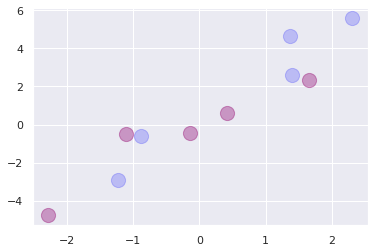

In [ ]:
import numpy as np

N = 10 # Number of random points
M = 5  # Select this number of them

mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = np.random.multivariate_normal(mean, cov, N)

indices = np.random.choice(X.shape[0], M, replace=False)
Y = X[indices]

import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], facecolor='blue', s=200, alpha=0.2)
plt.scatter(Y[:, 0], Y[:, 1], facecolor='red', s=200, alpha=0.2);

##Binning Data

Given a bunch of random numbers `x` and bins `bins` create a histogram. You need to calculate `counts` -- an array of numbers that represent how many of `x`-s fall into range from `bins[i-1]` to `bins[i]`. You may want to use [`numpy.searchsorted` function](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html).

In [ ]:
import numpy as np

# input
x = np.random.randn(100)
bins = np.linspace(-5, 5, 20)

# Enter your code here
counts = 


# Plotting
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.plot(bins, counts, drawstyle='steps')
ax = fig.add_subplot(1,2,2)
ax.hist(x, bins, histtype='step');
plt.show()

###Solution

(20,) (20,)


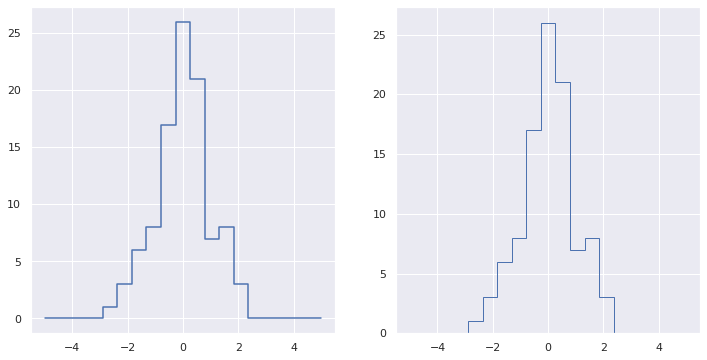

In [ ]:
import numpy as np

# input
x = np.random.randn(100)
bins = np.linspace(-5, 5, 20)

# Solution  
counts = np.zeros_like(bins)   # compute a histogram by hand
i = np.searchsorted(bins, x)   # find the appropriate bin for each x
np.add.at(counts, i, 1)        # add 1 to each of these bins
print(bins.shape, counts.shape)


# Plotting
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.plot(bins, counts, drawstyle='steps')
ax = fig.add_subplot(1,2,2)
ax.hist(x, bins, histtype='step');
plt.show()

## K-nearest neighbours

Complete function `get_nearest` so that it returns an array that contains coordinates of `N` nearest neighbours of `X`, i.e. the `i`-th element of the returned array shoud be `np.array` with `N` elements, each contains coordinates of the nearest neighbour.

* Complete the function `get_nearest`
* Check that your output coincides with the output of the hidden solution
* Run the "Visualize" block to see how it works

In [ ]:
import numpy as np

def get_nearest(X, N):
  # Enter your code here
  

# Input
X = np.array([[0.3, 0.1], [0.9, 0.3], [0.5, 0.1], [0.1, 0.9]])
labels = ['Original point', 'first neighbour', 'second neighbour', 'third neighbour', 'fourth neighbour']
N = len(labels) - 1
nn = get_nearest(X, N)

# Output
from google.colab import data_table
import pandas as pd
arr = np.array([str((x[0], x[1])) for x in X])
arr2 = np.array([[str((x[0], x[1])) for x in n] for n in nn])
np.vstack([arr.T, arr2.T])
dt = data_table.DataTable(pd.DataFrame(np.vstack([arr.T, arr2.T]), index=labels))#, index=['Name', 'Problems solved']))
import IPython
display(IPython.display.HTML(dt._repr_html_()))


In [ ]:
#@title Solution (double click to see the source code)

import numpy as np

def get_nearest(X, N):
  dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
  nearest = np.argsort(dist_sq, axis=1)
  return X[nearest[:, :N]]

# Input
X = np.array([[0.3, 0.1], [0.9, 0.3], [0.5, 0.1], [0.1, 0.9]]) #@param
labels = ['Original point', 'first neighbour', 'second neighbour', 'third neighbour', 'fourth neighbour']  #@param
N = len(labels) - 1
nn = get_nearest(X, N)

# Output
from google.colab import data_table
import pandas as pd
arr = np.array([str((x[0], x[1])) for x in X])
arr2 = np.array([[str((x[0], x[1])) for x in n] for n in nn])
np.vstack([arr.T, arr2.T])
dt = data_table.DataTable(pd.DataFrame(np.vstack([arr.T, arr2.T]), index=labels))#, index=['Name', 'Problems solved']))
import IPython
display(IPython.display.HTML(dt._repr_html_()))

,0,1,2,3
Original point,"(0.3, 0.1)","(0.9, 0.3)","(0.5, 0.1)","(0.1, 0.9)"
first neighbour,"(0.3, 0.1)","(0.9, 0.3)","(0.5, 0.1)","(0.1, 0.9)"
second neighbour,"(0.5, 0.1)","(0.5, 0.1)","(0.3, 0.1)","(0.3, 0.1)"
third neighbour,"(0.9, 0.3)","(0.3, 0.1)","(0.9, 0.3)","(0.5, 0.1)"
fourth neighbour,"(0.1, 0.9)","(0.1, 0.9)","(0.1, 0.9)","(0.9, 0.3)"


In [ ]:
#@title Visualize get_nearest

import numpy as np

X = np.random.rand(30, 2) #@param


import plotly.graph_objects as go

fig = go.Figure()

def add_plot(fig, X, N):
  lst = get_nearest(X, N)
  xfit, yfit = [], []
  for (Xi, lst) in zip(X, get_nearest(X, N+1)):
    for Xj in lst:
      xfit.append(Xi[0]); xfit.append(Xj[0]); xfit.append(None)
      yfit.append(Xi[1]); yfit.append(Xj[1]); yfit.append(None)

  fig.add_trace(go.Scatter(mode="lines+markers",
      visible=False, line=dict(color="#00CED1", width=3),
      name= str(N) + "-nearest neighbours", marker=dict(color="#000000"),
      x=xfit, y=yfit))
  
def make_steps(Nmax):
  steps = []
  for i in range(Nmax):
    step = dict(method="restyle",
    args=["visible", [False] * (Nmax + 1)],
    label=str(i))
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
  return steps

Nmax = 10
for i in range(Nmax + 1):
  add_plot(fig, X, i)
fig.data[0].visible = True

sliders = [dict(active=0, currentvalue={"prefix": "Nearest neighbours: "}, pad={"t": 50}, steps=make_steps(Nmax+1))]
fig.update_layout(
    width=600, height=600,
    sliders=sliders,
    #yaxis = {'range': [0.0, 1.0], 'autorange':False},
    #xaxis = {'range': [0.0, 1.0], 'autorange':False}
)
fig.show()

#7. Minesweeper.

## 1. Generate field of given size containing zeros and ones ("mines")

**Problem:**
Create numpy array `field_mask`.
Size of the array is given as tuple `field_m_n`.
Set all entries equal to zero except few randomly chosen that you should set to 1.
Number of ones is given as `num_mines`.

**Possible Input:**
```python
field_m_n = (5, 5)
num_mines = 3
```

**Possible Output:**
```
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)
```

In [ ]:
import numpy as np

# Input
field_m_n = (5, 5)
num_mines = 3

# Enter your code here

# Output
field_mask

### Solution

In [ ]:
import numpy as np

# Input
field_m_n = (5, 5)
num_mines = 3

# Solution
_t = np.arange(0, field_m_n[0] * field_m_n[1], 1)
np.random.shuffle(_t)

mines_ix = _t[:num_mines]

field_mask = np.zeros(shape=field_m_n, dtype=np.uint8)
field_mask.ravel()[mines_ix] = 1

# Output
field_mask

## 2. Count neighbours


**Problem:**
Given `field_mask` -- array of zeros and ones (0 - no mine, 1 - mine) generate array `mines` that contains number of neighbouring mines. Cells where the actual mines are positioned fill with numpy nan.

**Possible Input:**
```python
field_mask = np.array([[0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0]], dtype=np.uint8)
```

**Expected Output:**
```
array([[ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  2., nan],
       [ 0.,  0.,  0.,  2., nan],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1., nan,  1.,  0.,  0.]], dtype=float32)
```       

In [ ]:
import numpy as np

# Input
field_mask = np.array([[0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0]], dtype=np.uint8) #@param

# Enter your code here

# Output
mines

### Solution

In [ ]:
import numpy as np

# Input
field_mask = np.array([[0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0]], dtype=np.uint8)

# Solution
padded_field_mask = np.zeros(shape=(field_mask.shape[0] + 2, field_mask.shape[1] + 2), dtype=np.uint8)
padded_field_mask[1:-1, 1:-1] = field_mask

mines = np.zeros(shape=field_mask.shape, dtype=np.uint8)

ker = np.ones(shape=(3, 3), dtype=np.uint8)
for i in range(field_mask.shape[0]):
  for j in range(field_mask.shape[1]):
    mines[i, j] = (padded_field_mask[i:i+3, j:j+3] * ker).sum()
    
mines = mines.astype(np.float32)
mines[field_mask == 1] = np.nan

# Output
mines

## 3. Collect everything together

**Problem:**
complete given code by copy-pasting you previous solutions to marked places

In [ ]:
import numpy as np

field_m_n = (5, 5)
num_mines = 3

# Put solution to problem 1 here

# Put solution to problem 2 here


style_str = '''
<style>
   div.general { 
    font-size: 120%; 
    font-family: Verdana, Arial, Helvetica, sans-serif; 
    color: #333366; 
    width:  30px;
    height: 30px;
    cursor: default;
    vertical-align: middle;
    text-align: center;
   }
   div.closed { 
    background-color: RGB(50, 0, 50);
   }
   div.open { 
    background-color: RGB(255, 255, 255);
   }
</style>\n\n
'''


import IPython
from google.colab import output

def generate_grid_html(fld):
  w, h = fld.shape
  s = style_str
  s += '<table>\n'
  for y in range(h):
    s += '\t<tr>\n'
    for x in range(w):
      s += '\t\t<td>'
      if fld[y, x] < 0.0:
        s += '<div class=\"general closed\"'
        s += 'onclick=\"google.colab.kernel.invokeFunction(\'notebook.FieldClick\', ['
        s += str(x) + ',' + str(y) 
        s += ' ], {})\"></div>'
      elif np.isnan(fld[y, x]):
        s += '<div class=\"general open\">'
        s += '*'
        s += '</div>'        
      else:
        s += '<div class=\"general open\">'
        s += str(int(fld[y, x])) 
        s += '</div>'
      s += '</td>\n'
    s += '\t</tr>\n'
  s += '</table>'
  #print(s)
  return s
  
field = np.repeat(-1.0, mines.size).reshape(mines.shape)
display(IPython.display.HTML(generate_grid_html(field)))

def recursive_open(mines, x, y, mask):
  w, h = mines.shape
  x = np.clip(x, 0, w - 1)
  y = np.clip(y, 0, h - 1)
  if mask[y,x] == 1:
    return
  mask[y,x] = 1
  if mines[y,x] != 0:
    return
  for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
      recursive_open(mines, x + dx, y + dy, mask)

def field_click(x, y):
  global field
  global mines
  if np.isnan(mines[y][x]):
    field = mines
  opened = np.repeat(0, mines.size).reshape(mines.shape)
  recursive_open(mines, x, y, opened)
  field[opened == 1] = mines[opened == 1]
  output.clear(wait=False)
  display(IPython.display.HTML(generate_grid_html(field)))
  if np.isnan(mines[y,x]):
    print("BOOM!!")
  elif np.sum(field > -1.0) == np.count_nonzero(~np.isnan(mines)):
    print("WINNER!!!")
    
    
output.register_callback('notebook.FieldClick', field_click)

### Solution

In [ ]:
import numpy as np

field_m_n = (5, 5)
num_mines = 3

_t = np.arange(0, field_m_n[0] * field_m_n[1], 1)
np.random.shuffle(_t)

mines_ix = _t[:num_mines]

field_mask = np.zeros(shape=field_m_n, dtype=np.uint8)
field_mask.ravel()[mines_ix] = 1

padded_field_mask = np.zeros(shape=(field_mask.shape[0] + 2, field_mask.shape[1] + 2), dtype=np.uint8)
padded_field_mask[1:-1, 1:-1] = field_mask

mines = np.zeros(shape=field_mask.shape, dtype=np.uint8)

ker = np.ones(shape=(3, 3), dtype=np.uint8)
for i in range(field_mask.shape[0]):
  for j in range(field_mask.shape[1]):
    mines[i, j] = (padded_field_mask[i:i+3, j:j+3] * ker).sum()
    
mines = mines.astype(np.float32)
mines[field_mask == 1] = np.nan


style_str = '''
<style>
   div.general { 
    font-size: 120%; 
    font-family: Verdana, Arial, Helvetica, sans-serif; 
    color: #333366; 
    width:  30px;
    height: 30px;
    cursor: default;
    vertical-align: middle;
    text-align: center;
   }
   div.closed { 
    background-color: RGB(50, 0, 50);
   }
   div.open { 
    background-color: RGB(255, 255, 255);
   }
</style>\n\n
'''


import IPython
from google.colab import output

def generate_grid_html(fld):
  w, h = fld.shape
  s = style_str
  s += '<table>\n'
  for y in range(h):
    s += '\t<tr>\n'
    for x in range(w):
      s += '\t\t<td>'
      if fld[y, x] < 0.0:
        s += '<div class=\"general closed\"'
        s += 'onclick=\"google.colab.kernel.invokeFunction(\'notebook.FieldClick\', ['
        s += str(x) + ',' + str(y) 
        s += ' ], {})\"></div>'
      elif np.isnan(fld[y, x]):
        s += '<div class=\"general open\">'
        s += '*'
        s += '</div>'        
      else:
        s += '<div class=\"general open\">'
        s += str(int(fld[y, x]))
        s += '</div>'
      s += '</td>\n'
    s += '\t</tr>\n'
  s += '</table>'
  #print(s)
  return s
  
field = np.repeat(-1.0, mines.size).reshape(mines.shape)
display(IPython.display.HTML(generate_grid_html(field)))

def recursive_open(mines, x, y, mask):
  w, h = mines.shape
  x = np.clip(x, 0, w - 1)
  y = np.clip(y, 0, h - 1)
  if mask[y,x] == 1:
    return
  mask[y,x] = 1
  if mines[y,x] != 0:
    return
  for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
      recursive_open(mines, x + dx, y + dy, mask)

def field_click(x, y):
  global field
  global mines
  if np.isnan(mines[y][x]):
    field = mines
  opened = np.repeat(0, mines.size).reshape(mines.shape)
  recursive_open(mines, x, y, opened)
  field[opened == 1] = mines[opened == 1]
  output.clear(wait=False)
  display(IPython.display.HTML(generate_grid_html(field)))
  if np.isnan(mines[y,x]):
    print("BOOM!!")
  elif np.sum(field > -1.0) == np.count_nonzero(~np.isnan(mines)):
    print("WINNER!!!")
    
    
output.register_callback('notebook.FieldClick', field_click)

0,0,1,1,1
1,1,1,,2
,1,1,2,
1,1,0,1,1
0,0,0,0,0


WINNER!!!
